In [142]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import Week

today = pd.Timestamp.today().normalize()

In [143]:
data_dir = os.path.join('..', 'DATA')
file_name = 'Dishpatch Subscriptions_Clean_FINAL.xlsx'

file_path = os.path.abspath(os.path.join(data_dir, file_name))

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found{file_path}")

df = pd.read_excel(file_path)

df['Trial End (UTC) + 2 Weeks'] = df['Trial End (UTC)'] + pd.Timedelta(weeks=2)

for col in df.select_dtypes(include='datetime64[ns]').columns:
    df[col + '_Year'] = df[col].dt.isocalendar().year
    df[col + '_Week'] = df[col].dt.isocalendar().week

In [144]:
df.head(1)
df.columns

Index(['id', 'Customer ID', 'Customer Description', 'Customer ID.1', 'Plan',
       'Product', 'Product ID', 'Quantity', 'Currency', 'Cancellation Reason',
       'Interval', 'Amount', 'Status', 'Created (UTC)', 'Start (UTC)',
       'Start Date (UTC)', 'Current Period Start (UTC)',
       'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
       'Application Fee Percent', 'Coupon', 'Tax Percent', 'Canceled At (UTC)',
       'Cancel At Period End', 'Ended At (UTC)', 'Exclusive Tax Rate',
       'Inclusive Tax Rate', 'Automatic Tax Enabled',
       'Tax Location Recognized', 'kind (metadata)',
       'senderShopifyCustomerId (metadata)', 'shopifyCustomerId (metadata)',
       'previousEndDate (metadata)', 'Trial End (UTC) + 2 Weeks',
       'Created (UTC)_Year', 'Created (UTC)_Week', 'Start (UTC)_Year',
       'Start (UTC)_Week', 'Start Date (UTC)_Year', 'Start Date (UTC)_Week',
       'Current Period Start (UTC)_Year', 'Current Period Start (UTC)_Week',
       'Current

In [145]:
# How many full members (e.g. members who have completed their trial,
# have an active membership and are not gifted members)
# did we have at the start of each week, since Sep 2023?
full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Status'] == 'active') &                          # is active
    (df['Canceled At (UTC)'].isna())                     # not cancelled
]

# How many new, full members joined during each week
new_full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial End (UTC)'] < today) & # Trial Over
    (df['Status'] == 'active') # is active
]

# How many new members signed up to trial each week since 2023?
new_trial_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial Start (UTC)'] < today) &                  # Trial Over
    (df['Status'] == 'active')                           # is active
]

# How many of each weekly cohort converted trial -> full membership


# How many cancelled before the end of their trial date
members_cancel_during_trial = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Canceled At (UTC)'] < df['Trial End (UTC)'])    # Cancel during trial
]

# How many requested a refund within 2 weeks of their full membership starting
members_cancel_2_weeks_after_trial_end = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Canceled At (UTC)'] < df['Trial End (UTC) + 2 Weeks'])
]

# How many of each weekly cohort renewed from Year 1 -> Year 2

# How many cancelled before the end of Year 1 membership

# How many requested a refund within 2 weeks of their Year 2 membership starting


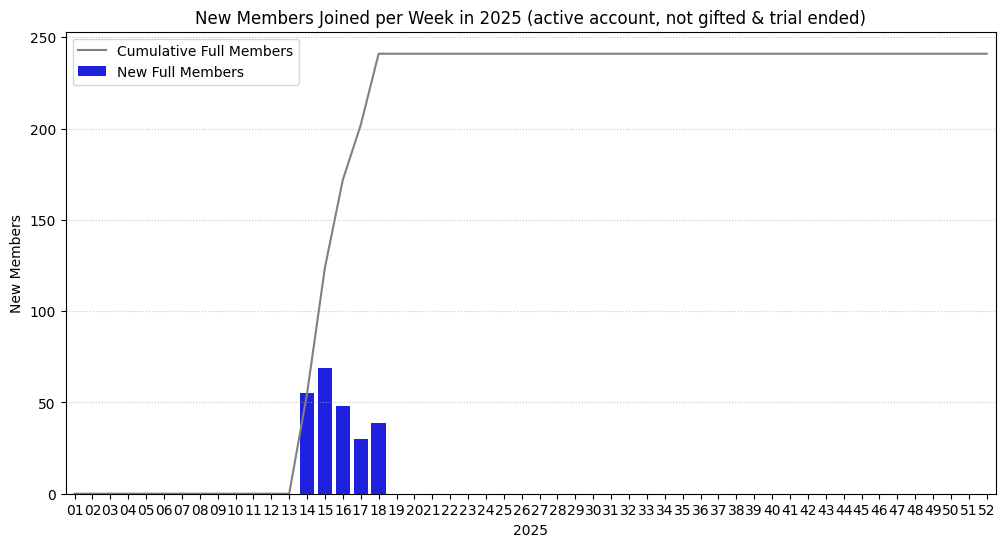

241 full members with active account, not gifted & trial ended


In [146]:
# FULL MENBERS VS NEW FULL MENBERS

# Count new members per week for 2025 and reindex to include all weeks
week_labels = [f"{week:02d}" for week in range(1, 53)]
new_full_members = full_members['Start (UTC)_Week'].value_counts().reindex(range(1, 53), fill_value=0)
cumulative_full_members = new_full_members.cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=week_labels, y=cumulative_full_members.values, color='grey', label='Cumulative Full Members')
sns.barplot(x=week_labels, y=new_full_members.values, color='blue', label='New Full Members')

plt.xlabel('2025')
plt.ylabel('New Members')
plt.title('New Members Joined per Week in 2025 (active account, not gifted & trial ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(full_members)} full members with active account, not gifted & trial ended")


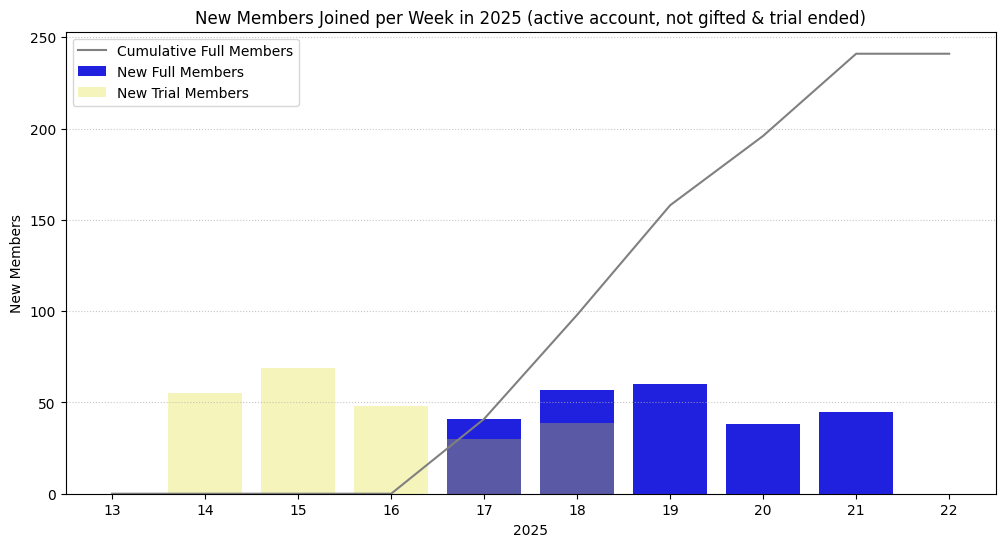

241 full members with active account, not gifted & trial ended


In [147]:
# FULL MENBERS VS NEW FULL MENBERS

# Count new members per week for 2025 and reindex to include all weeks
week_labels = [f"{week:02d}" for week in range(13, 23)]
new_full_members = full_members['Trial End (UTC) + 2 Weeks_Week'].value_counts().reindex(range(13, 23), fill_value=0)
new_trial_members = new_trial_members['Trial Start (UTC)_Week'].value_counts().reindex(range(13, 23), fill_value=0)
cumulative_full_members = new_full_members.cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=week_labels, y=cumulative_full_members.values, color='grey', label='Cumulative Full Members')
sns.barplot(x=week_labels, y=new_full_members.values, color='blue', label='New Full Members')
sns.barplot(x=week_labels, y=new_trial_members.values, color='yellow', label='New Trial Members', alpha=0.3)
plt.xlabel('2025')
plt.ylabel('New Members')
plt.title('New Members Joined per Week in 2025 (active account, not gifted & trial ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(full_members)} full members with active account, not gifted & trial ended")


In [148]:
full_members['Trial End (UTC) + 2 Weeks_Week']

0      21
1      21
2      21
3      21
4      21
       ..
338    17
339    17
343    17
344    17
345    17
Name: Trial End (UTC) + 2 Weeks_Week, Length: 241, dtype: UInt32